# XGBoost


## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb

In [2]:
# metoden .__version__ returnerar det importerade bibliotekets verion
pd.__version__

'2.1.1'

## Importing the dataset

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:, -1].values

In [4]:
X.shape

(10, 1)

In [5]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [6]:
y.shape

(10,)

In [7]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [8]:
# omvandla formatet på y för att passa som input till StandardScaler.fit_transform(X)
y=y.reshape(len(y),1)


In [9]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

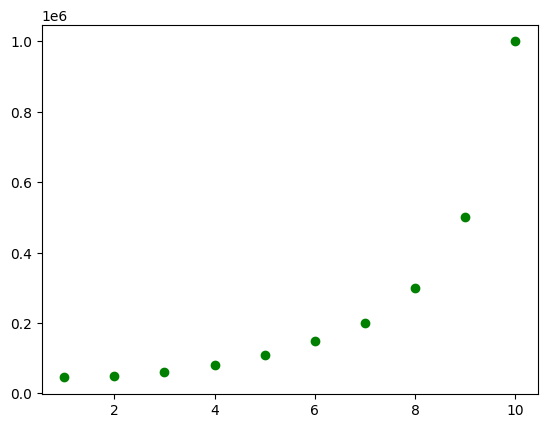

In [10]:
plt.scatter(X, y, color = 'g')
plt.show()

## Splitting the dataset into the Training set and Test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [21]:
# Vi vill göra skalning både på X och y. Instantiera därför två
# separata objekt av StandardScaler, t.ex sc_X och sc_y
# Vi har bara EN kolumn i X och EN i y
# Skala om X och y
# Visa dem i en plot

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc_X = StandardScaler()
sc_y = StandardScaler()

In [24]:
X_train = sc_X.fit_transform(X_train)

In [25]:
y_train = sc_y.fit_transform(y_train)

In [26]:
X_train.shape

(8, 1)

In [27]:
y_train.shape

(8, 1)

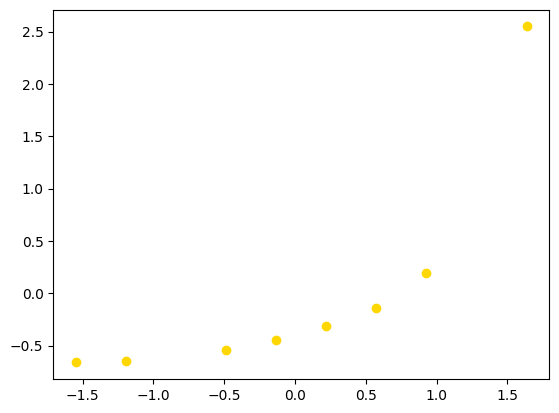

In [28]:
plt.scatter(X_train, y_train, color = 'gold')
plt.show()

## Training the XGBoost model on the whole dataset

In [29]:
# Dessa nya X och y ska användas i klassen XGB, som vi instantierar som en regressor
# Ni måste Googla i Scikit-learn på XGBoost hur man importerar den


In [30]:
import xgboost as xgb
regressor = xgb.XGBRegressor()
#regressor = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_test, y_test)])

[0]	validation_0-rmse:0.83570	validation_1-rmse:0.71256
[1]	validation_0-rmse:0.70100	validation_1-rmse:0.65977
[2]	validation_0-rmse:0.58956	validation_1-rmse:0.62163
[3]	validation_0-rmse:0.49680	validation_1-rmse:0.59225
[4]	validation_0-rmse:0.41944	validation_1-rmse:0.57047
[5]	validation_0-rmse:0.35458	validation_1-rmse:0.55404
[6]	validation_0-rmse:0.30000	validation_1-rmse:0.54090
[7]	validation_0-rmse:0.25397	validation_1-rmse:0.53068
[8]	validation_0-rmse:0.21510	validation_1-rmse:0.52264
[9]	validation_0-rmse:0.18227	validation_1-rmse:0.51624
[10]	validation_0-rmse:0.15451	validation_1-rmse:0.51108
[11]	validation_0-rmse:0.13103	validation_1-rmse:0.50689
[12]	validation_0-rmse:0.11116	validation_1-rmse:0.50344
[13]	validation_0-rmse:0.09433	validation_1-rmse:0.50060
[14]	validation_0-rmse:0.08007	validation_1-rmse:0.49824
[15]	validation_0-rmse:0.06800	validation_1-rmse:0.49626
[16]	validation_0-rmse:0.05777	validation_1-rmse:0.49461
[17]	validation_0-rmse:0.04908	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Predicting a new result

In [35]:
# Hur ska vi använda regressor.predict för att modellera 
# lön om erfarenheten är 6.5 ?

print(regressor.predict(sc_X.transform([[6.5]])))

[2.5481915]
[-0.64519334  0.1953642 ]


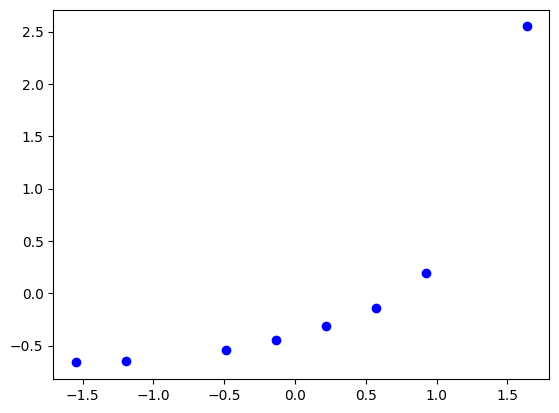

In [32]:
y_pred = regressor.predict(sc_X.transform(X_test))
plt.scatter(X_train, y_train, color = 'b')
plt.show()

## Visualising the XGBoost results

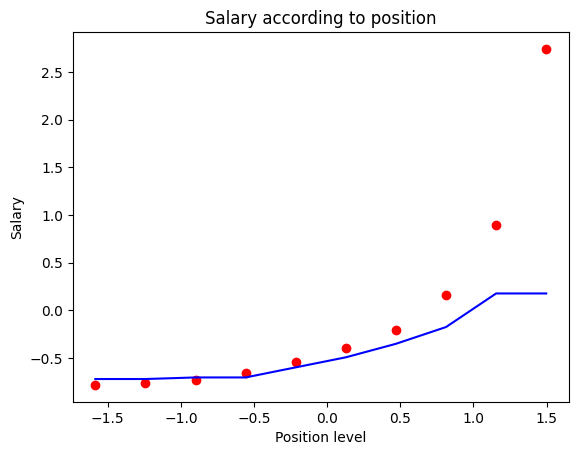

In [36]:
# Ska plotta X värden mot predicerade y värden,
# samt lägga in ursprunglig data som punkter.
# Kom ihåg att både X och y variablerna redan 
# är transformerade! Vi måste transformera
# tillbaka bägge!
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y.reshape(-1,1)), color='red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)),color='blue')
plt.title('Salary according to position')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the XGB results (for higher resolution and smoother curve)

/var/folders/xg/fxsf84n93916njsh4lzg7sz80000gn/T/ipykernel_63967/3871812339.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)),0.2)


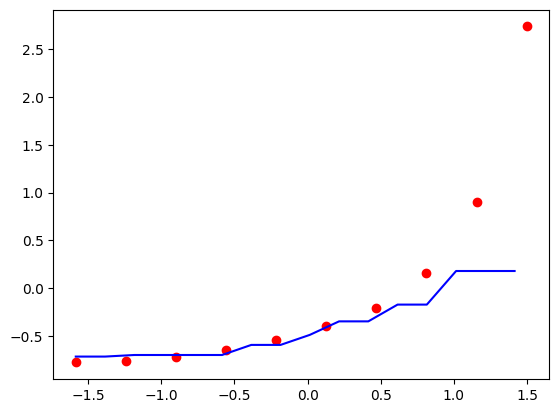

In [37]:
# Vill göra plotten mjukare genom att öka upplösningen.
# Skapaer ett ny 'rutnät' (grid) på X axeln, som delar
# in intervallet i punkter med avståndet 0.1
# Räknar sedan ut vad modellen predicerar för dessa
# punter, och använter plot funktionen för att
# skriva ut punkterna i en graf och förbinda 
# med linjer
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)),0.2)
X_grid = X_grid.reshape((-1, 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y.reshape(-1,1)), color='red')
plt.plot(X_grid,sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)),color='blue')

In [38]:
regressor.predict(X).reshape(-1,1).shape

(10, 1)